# Cuaderno de ejemplo #

Los cuadernos de jupyter mezclan texto en prosa, con código y con los resultados de la ejecución del código.

El texto en prosa se escribe en markdown, el siguiente enlace contiene una breve referencia a la sencilla sintaxis de markdown para formatear texto: https://www.markdownguide.org/basic-syntax

Los cuadernos se componen de celdas (cells) y cada celda puede ser de tipo Python o Markdown. Las celdas se pueden agregar, eliminar, y mover hacia arriba y hacia abajo.


## Notación matemática ##

Podemos utilizar la notación matemática LaTeX en línea dentro de un mismo párrafo delimitando las expresiones entre signos de dólar, por ejemplo $c^2 = a^2 + b^2$, o $n = 1$.

(doble click a la celda para ver/editar el código, luego ctrl+enter o click al botón Run para ejecutar/interpretar el código)

También podemos escribir bloques separados del párrafo, delimitando el inicio y fin del bloque con dos signos de dólar, como se ejemplifica a continuación:

$$
\begin{aligned}
y = mx + b \\
y - b = mx \\
m = \frac{y - b}{x} \\
\end{aligned}
$$

Sumatorias:

$$
\sum_{i=1}^{n} i = \frac{n(n + 1)}{2}
$$

Notación asintótica:

$$
\mathcal{O}(n^2) \\
\Omega(n \log n) \\
\Theta(2^n)
$$

Notación de arreglo $A = [a_1, a_2, \dots, a_n]$

Símbolos matemáticos en LaTeX https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

## Código python ###

La siguiente celda importa una función que se encuentra declarada en el módulo `algoritmos.py` localizado en la misma carpeta que este cuaderno.

In [2]:
from algoritmos import fact

In [3]:
fact(5)

120

También podemos declarar funciones en el cuaderno mismo.

In [4]:
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [5]:
fib(5)

8

Podemos ejecutar fragmentos de código sin necesariamente declarar una función.

In [6]:
'A, B, C'.split(',')

['A', ' B', ' C']

In [7]:
mensaje = 'hola mundo'
print(f'Este es el mensaje: {mensaje}')

Este es el mensaje: hola mundo


## Gráficos ##

Para graficar utilizaremos la biblioteca `matplotlib`.

In [8]:
xs = range(100)
ys = [x**2 for x in xs]

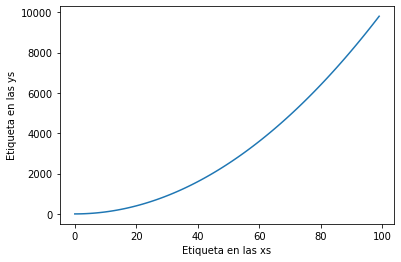

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(xs, ys)
plt.ylabel('Etiqueta en las ys')
plt.xlabel('Etiqueta en las xs')
plt.show()


Graficando múltiples funciones

In [10]:
from math import log

xs = range(1, 100)
ys_1 = [2 * x for x in xs] # lineal
ys_2 = [30 * log(x) for x in xs] # logarítmica
ys_3 = [x * log(x) for x in xs] # linearítmica

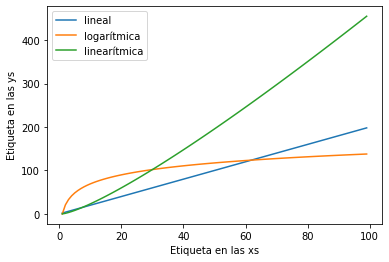

In [11]:
plt.plot(xs, ys_1, label = 'lineal')
plt.plot(xs, ys_2, label = 'logarítmica')
plt.plot(xs, ys_3, label = 'linearítmica')
plt.ylabel('Etiqueta en las ys')
plt.xlabel('Etiqueta en las xs')
plt.legend(loc = 2)
plt.show()

## Midiendo el tiempo de ejecución ##

Utilizaremos la función `big_o` para medir los tiempos de ejecución de una función. Suponemos que la función que vamos a medir siempre recibe un arreglo de tamaño `n`.

La función `big_o` recibe los siguientes parámetros:

```
big_o(
  <función a medir>, 
  <función de generación de arreglos>, 
  min_n=<límite inferior de tamaños de arreglo>,
  max_n=<límite superior de tamaños de arreglo>,
  n_measures=<número de muestras a probar, las muestras siempre 
      estarán entre [min_n .. max_n]>,
  n_repeats=<número de veces que se ejecutará la función con 
      cada muestra>,
  verbose=<False para reducir el número de mensajes producidos 
      por la ejecución de esta función>,
  classes=<el algoritmo trata de determinar si los resultados 
      de la medición calzan con la clase asintótica pasada por 
      este parámetro>,
  return_raw_data=<True para obtener los datos de tamaño de 
      arreglo y tiempo de ejecución de la función medida>
)
```

La función a medir es aquella que queremos probar y verificar, sería la función que implemente alguno de nuestros algoritmos de ordenamiento.

La función `big_o` ejecutará la función a medir con diferentes tamaños de arreglos y registrará el tiempo que tarde en finalizar (en segundos). 

Los tamaños de los arreglos de prueba estarán en el rango `[min_n .. max_n]`. En total se escogerán `n_measures` arreglos de prueba, y para cada arreglo se ejecutará la función `n_repeats` veces, tamando el menor tiempo obtenido.

Por ejemplo, si `min_n=1`, `max_n=10`, `n_measures=5` y `n_repeats=3` entonces se tomarán 5 medidas en el rango $[1 .. 10]$, posiblemente `[1, 3, 5, 7, 9]` (las medidas se toman equidistantemente). Para cada una de estas medidas `n` se generará un arreglo de tamaño `n` invocando a la función de generación de arreglos pasada por parámetro. Luego se invocará a la función a medir 3 veces diferentes con este mismo arreglo registrando el tiempo de ejecución para cada una, al final se toma el menor tiempo de ejecución.

Los valores de tamaño `n` y su correspondiente tiempo de ejecución se guardan en el objeto `datos` que retorna la función.

Generar arreglos aleatorios de tamaño `n`

In [12]:
from random import shuffle
from random import seed

seed(42) # Permite la reproducibilidad de los experimentos

def gen_aleatorio(n):
    arr = list(range(n))
    shuffle(arr)
    return arr

In [13]:
gen_aleatorio(10)

[7, 3, 2, 8, 5, 6, 9, 4, 0, 1]

Generando arreglos ordenados ascendentemente

In [14]:
def gen_asc(n):
    arr = list(range(n))
    return arr

In [15]:
gen_asc(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Generando arreglos ordenados descendemente

In [16]:
def gen_desc(n):
    arr = list(range(10, 0, -1))
    return arr

In [17]:
gen_desc(10)

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [18]:
from big_o import big_o
from big_o import complexities as cls

La función `aprox_asintotica` imprime los resultados de estimar si la función medida se aproxima a la clase asintótica pasada por parámetro en `classes`.

In [19]:
def aprox_asintotica(datos):
    ys = datos['times']
    for k, v in datos.items():
        if isinstance(k, cls.ComplexityClass):
            residual = v
            r2 = 1 - residual / (ys.size * ys.var())
            print(k, f' (r={residual}, r^2={r2})')

Se recomienda mover las funciones `gen_aleatorio`, `gen_asc`, `gen_desc` y `aprox_asintotica` a un módulo python para importar y reutilizar en sus cuadernos sin necesidad de duplicar el código.

### Prueba de concepto ###

A modo de prueba de concepto, vamos a medir los tiempos de respuesta de la función `sorted` de python.

In [20]:
clase, datos = big_o(sorted, 
                     gen_aleatorio,
                     min_n=10, max_n=5000,
                     n_measures=100, n_repeats=10,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Linearithmic])

Las clases disponibles para pasar a `classes` son:
* `cls.Constant` : constante
* `cls.Linear` : lineal
* `cls.Quadratic` : cuadrática
* `cls.Cubic` : cúbica
* `cls.Logarithmic` : logarítmica
* `cls.Linearithmic` : linearítmica o $n \log n$
* `cls.Exponential` : exponencial

Es posible pasar más de una clase por llamada a `big_o` (Note que el parámetro es una lista).

Evaluamos la estimación de la aproximación asintótica

In [21]:
aprox_asintotica(datos)

Linearithmic: time = 8E-05 + 2.1E-07*n*log(n) (sec)  (r=4.9423660635344983e-05, r^2=0.9316598066088807)


Entre más cerca se encuentre el valor `r^2` a 1 tendremos más confianza de que los resultados de la medición se acercan asintóticamente a la clase especificada, que es $\mathcal{O}(n \log n)$ en el caso de nuestro ejemplo. Un valor por debajo de `0.7` debería generarnos dudas sobre si los resultados se acercan a la clase especificada.

Graficamos los resultados

In [22]:
xs = datos['measures']
ys = datos['times']
aprox_ys = [-3.4E-5 + 2E-7 * x * log(x) for x in xs]

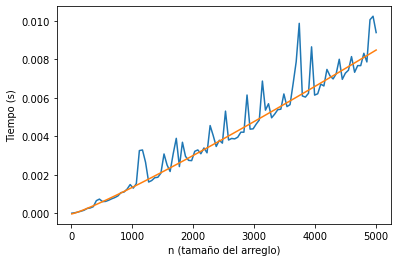

In [23]:
plt.plot(xs, ys)
plt.plot(xs, aprox_ys, label = 'aprox')
plt.ylabel('Tiempo (s)')
plt.xlabel('n (tamaño del arreglo)')
plt.show()